In [3]:
## Задача 1
# Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
# Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
# Полученные значения должны быть равны.
# Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
# а затем с использованием функций из библиотек numpy и pandas.


In [4]:
import numpy  as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

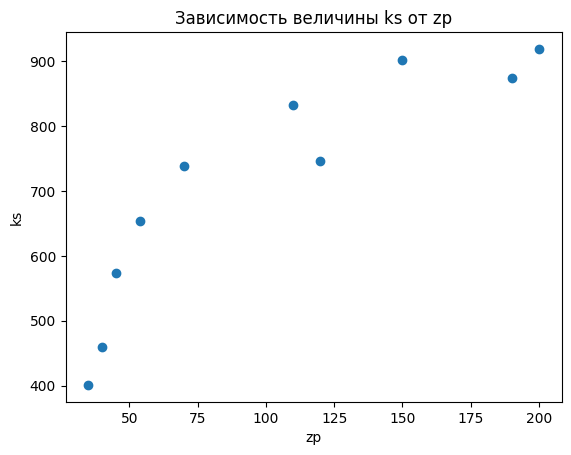

In [10]:
# Построим график проверим, чтоб зависимость величин не была U образной
plt.scatter(zp,ks)
plt.title('Зависимость величины ks от zp')
plt.xlabel('zp')
plt.ylabel('ks')
plt.show()


In [7]:
print(zp)
print(ks)

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [8]:
# одна из формул для расчета cov =  M(X * Y) - M(X) * M(Y), где M(X * Y) произведение двух случайных величин.
# согласно определению (насколько я понял) случайная величина, равная произведению двух случайных величин это 
# все возможные произведения значения одно СВ на другую.
# в блокноте это выглядит так np.outer(zp, ks).flatten().mean()
# следовательно расчет cov выглядит так 
# cov = np.outer(zp, ks).flatten().mean() - zp.mean() *  ks.mean()
# но по факту этот расчет всегда дает 0, что тоже очевидно, если развернуть расчет.
# мы в своих расчета cov делаем так
# cov = (zp * ks).mean() - zp.mean() *  ks.mean() # и это обеспечивает правильный результат.
# т.е. мы перемножаем поэлелементно, что про не соответствует определению произведения двух СВ.
# Почему подход "по учебнику", не обеспечивает правильный результат.

In [9]:
# Посчитаем cov через формулу для несмещенной ковариации
((zp * ks).mean() - zp.mean() *  ks.mean())*(len(ks)/(len(ks)-1))

10175.377777777774

In [23]:
# Посчитаем cov через numpy
np.cov(zp, ks)
# значения совпадают

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [49]:
# для расчета коэффициента корреляции Пирсона нужно рассчитать несмещенное СКО
σzp_not_off = (((zp - zp.mean())**2).sum()/(zp.size - 1))**0.5
σzp_not_off

62.31318747531162

In [50]:
σks_not_off = (((ks - ks.mean())**2).sum()/(ks.size - 1))**0.5
σks_not_off

183.99544076477068

In [51]:
# Посчитаем несмещенные СКО через np
print(np.std(zp, ddof=1))
print(np.std(ks, ddof=1))
# значения совпадают

62.31318747531162
183.99544076477068


In [52]:
# посчитаем коэффициент корреляции Пирсона через формулу.
(((zp * ks).mean() - zp.mean() *  ks.mean())*(len(ks)/(len(ks)-1)))/(σzp_not_off * σks_not_off)

0.8874900920739158

In [43]:
# посчитаем коэффициент корреляции Пирсона через np.
np.corrcoef(zp, ks)
# значения совпали

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [ ]:
## Задача 2
# Измерены значения IQ выборки студентов,
# обучающихся в местных технических вузах:
# 131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
# Известно, что в генеральной совокупности IQ распределен нормально.
# Найдите доверительный интервал для математического ожидания с надежностью 0.95.


In [ ]:
# при условии, что генеральная совокупность имеет нормальное распределение
# Xсреднвыб - delta < Xген < Xсреднвыб + delta
# delta - отклонение для среднего определяется как:
# delta = ty * SE
# ty - Коэффициент доверия
# SE - стандартная ошибка среднего 
# SE = σ / √n

In [12]:
x = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [19]:
σ = (((x - x.mean())**2).sum() / (x.size - 1))**0.5
σ

10.54566788359614

In [18]:
# проверим расчет 
np.std(x, ddof=1)
# значения совпадают

10.54566788359614

In [22]:
SE = σ/(x.size)**0.5
SE

3.3348329959851224

In [23]:
# табличное значение ty для надежности 0,95 для степени совбоды k = n-1, k = 10-1 = 9
ty = 2.2662

In [24]:
delta = ty * SE
delta

7.557398535501484

In [25]:
print(f'Доверительный интервал ({x.mean() - delta};{x.mean() + delta})')

Доверительный интервал (110.54260146449852;125.65739853550147)


In [ ]:
##Задача 3
# Известно, что рост футболистов в сборной распределен нормально
# с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
# среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
# ожидания с надежностью 0.95.

In [ ]:
# при условии, что генеральная совокупность имеет нормальное распределение
# Xсреднвыб - delta < Xген < Xсреднвыб + delta
# delta - отклонение для среднего определяется как:
# delta = ty * SE
# ty - Коэффициент доверия
# SE = √D / n

In [28]:
D = 25
n = 27
x_med_sampl = 174.2

In [29]:
SE = (D/n)**0.5
SE

0.9622504486493763

In [33]:
# известна дисперсия генеральной совокупности для определения доверительного интервала используем z критерий 
# ty для надежности 0,95 
ty = 1.97

In [35]:
delta = ty * SE
delta

1.8956333838392712

In [36]:
print(f'Доверительный интервал ({x_med_sampl - delta};{x_med_sampl + delta})')

Доверительный интервал (172.3043666161607;176.09563338383927)
